In [24]:
# Packages
import pandas as pd
import os
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_with_NLP_Features') if f.endswith('.parquet')]
# read in all parquet files
df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f) for f in file_list])

In [7]:
traindata = df[df.train_test_80_20 == "train"]
testdata = df[df.train_test_80_20 == "test"]

In [16]:
def naive_classifier(test_size):
    values, counts = np.unique(traindata["Change Direction Since Last Fixed Quarter Date"], return_counts=True)
    probability = counts / counts.sum()
    random_predictions = np.random.choice(values, size=test_size, p=probability)
    return random_predictions

test_size = testdata.shape[0]
pred = naive_classifier(test_size)

In [19]:
accuracy = sum(pred == testdata["Change Direction Since Last Fixed Quarter Date"])/test_size
print(accuracy)

0.9016100178890877


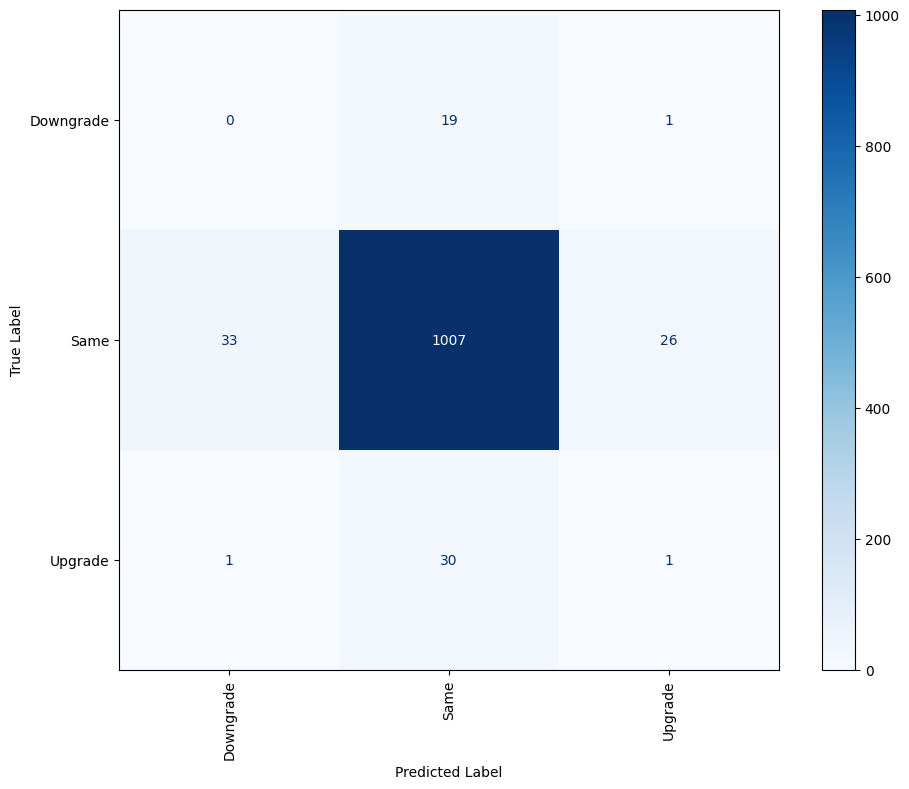

In [25]:
matix = confusion_matrix(testdata["Change Direction Since Last Fixed Quarter Date"], pred)
display_labels = ["Downgrade", "Same", "Upgrade"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=display_labels)
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()